In [567]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys
sys.path.append("../scripts/")  # Add the scripts folder to the path


In [568]:
from load_data import load_data_from_postgres, load_data_using_sqlalchemy
from sql_queries import execute_telecom_queries


In [570]:
# Load environment variables from .env file
load_dotenv()

# Fetch database connection parameters from environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [515]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"

# Load data from PostgreSQL using SQLAlchemy
df = load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


Successfully loaded the data


In [516]:
# Display the first few rows
df.head()

Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   
2                D42335A  ...          19725661.0          14699576.0   
3                T21824A  ...          21388122.0          15146643.0   
4                D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

In [517]:
df.size

8250055

In [518]:
df.shape

(150001, 55)

In [519]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [520]:
# List of columns to analyze
columns = ['Last Location Name', 'Handset Manufacturer', 'Handset Type']

# Calculate the number of unique values for each column
unique_values = df[columns].nunique()

# Display the result
print(unique_values)


Last Location Name      45547
Handset Manufacturer      170
Handset Type             1396
dtype: int64


In [521]:
# Check for differences within a small tolerance
tolerance = 1e-6
differences = df[abs(df['Dur. (ms).1'] - df['Dur. (ms)']) > tolerance]

print(f"Number of differing rows within tolerance: {len(differences)}")



Number of differing rows within tolerance: 150000


In [522]:
print(df.columns)



Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [523]:
scaling_factor = df['Dur. (ms).1'] / df['Dur. (ms)']
print(scaling_factor.unique())


[1000.00048913 1000.00027177 1000.00047806 ... 1000.00536392 1000.00644469
           nan]


In [524]:
# Drop Dur. (ms) and keep Dur. (ms).1
df.drop(columns=['Dur. (ms)'], inplace=True)  

In [525]:
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of

In [526]:
#Rename the Remaining Column
df.rename(columns={'Dur. (ms).1': 'Dur. (ms)'}, inplace=True)
print(df.columns)


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms)', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of s

In [527]:
# Convert ID-like fields to strings or objects
id_columns = ['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI']
df[id_columns] = df[id_columns].astype('object')

# Convert timestamp fields to datetime
timestamp_columns = ['Start', 'End']
df[timestamp_columns] = df[timestamp_columns].apply(pd.to_datetime)


# Convert text-based columns to category if appropriate
text_columns = ['Last Location Name','Handset Manufacturer', 'Handset Type']
df[text_columns] = df[text_columns].astype('category')



In [528]:
df.dtypes

Bearer Id                                           object
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
IMSI                                                object
MSISDN/Number                                       object
IMEI                                                object
Last Location Name                                category
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float64
50 Kbps < DL TP < 250 Kbps (%)                     float

In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 54 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 149010 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   IMSI                                      149431 non-null  object        
 6   MSISDN/Number                             148935 non-null  object        
 7   IMEI                                      149429 non-null  object        
 8   Last Location Name                        148848 non-null  category      
 9   Avg RTT DL (ms)

In [530]:
df.describe()

Start       Start ms  \
count                         150000  150000.000000   
mean   2019-04-26 12:36:09.616800256     499.188200   
min              2019-04-04 12:01:00       0.000000   
25%              2019-04-25 00:26:00     250.000000   
50%              2019-04-26 08:51:00     499.000000   
75%              2019-04-27 18:18:15     749.000000   
max              2019-04-29 07:28:00     999.000000   
std                              NaN     288.611834   

                                 End         End ms  Avg RTT DL (ms)  \
count                         150000  150000.000000    122172.000000   
mean   2019-04-27 17:39:38.703200256     498.800880       109.795706   
min              2019-04-24 22:59:00       0.000000         0.000000   
25%              2019-04-26 07:30:00     251.000000        32.000000   
50%              2019-04-27 23:02:00     500.000000        45.000000   
75%              2019-04-29 07:15:00     750.000000        70.000000   
max              2019-04-30 23:59:00     999.000000     96923.000000   
std                              NaN     288.097653       619.782739   

       Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
count    122189.000000            150000.000000            150000.000000   
mean         17.662883             13300.045927              1770.428647   
min           0.000000                 0.000000                 0.000000   
25%           2.000000                43.000000                47.000000   
50%           5.000000                63.000000                63.000000   
75%          15.000000             19710.750000              1120.000000   
max        7120.000000            378160.000000             58613.000000   
std          84.793524             23971.878541              4625.355500   

       TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  ...  \
count                 6.185500e+04                 5.335200e+04  ...   
mean                  2.080991e+07                 7.596587e+05  ...   
min                   2.000000e+00                 1.000000e+00  ...   
25%                   3.565150e+04                 4.694750e+03  ...   
50%                   5.687300e+05                 2.094950e+04  ...   
75%                   3.768308e+06                 8.402025e+04  ...   
max                   4.294426e+09                 2.908226e+09  ...   
std                   1.825665e+08                 2.645305e+07  ...   

       Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
count        1.500010e+05        1.500010e+05        1.500010e+05   
mean         1.163407e+07        1.100941e+07        1.162685e+07   
min          5.300000e+01        1.050000e+02        4.200000e+01   
25%          5.833501e+06        5.517965e+06        5.777156e+06   
50%          1.161602e+07        1.101345e+07        1.164222e+07   
75%          1.744852e+07        1.651556e+07        1.747048e+07   
max          2.325910e+07        2.201196e+07        2.325919e+07   
std          6.710569e+06        6.345423e+06        6.725218e+06   

       Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  \
count        1.500010e+05       1.500010e+05       1.500010e+05   
mean         1.100175e+07       4.220447e+08       8.288398e+06   
min          3.500000e+01       2.516000e+03       5.900000e+01   
25%          5.475981e+06       2.104733e+08       4.128476e+06   
50%          1.099638e+07       4.234081e+08       8.291208e+06   
75%          1.650727e+07       6.331742e+08       1.243162e+07   
max          2.201196e+07       8.434419e+08       1.655879e+07   
std          6.359490e+06       2.439675e+08       4.782700e+06   

       Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
count      1.500010e+05      1.500010e+05      1.500000e+05      1.500000e+05  
mean       4.211005e+08      8.264799e+06      4.112121e+07      4.546434e+08  
min        3.290000e+03      1.480000e+02      2.866892e+06      7.114041e+06  
25%   

In [531]:
df[['Last Location Name','Handset Manufacturer', 'Handset Type']].describe()

Last Location Name Handset Manufacturer      Handset Type
count              148848               149429            149429
unique              45547                  170              1396
top               D41377B                Apple  Huawei B528S-23A
freq                   80                59565             19752

In [532]:
#Dropping Columns with Single Value
data_single=df.copy()
single_value_columns = pd.DataFrame(data_single.apply(lambda x: len(x.value_counts()), axis=0), columns=['SingleValueColumn'])
drop_single_value_columns = list(single_value_columns.loc[single_value_columns['SingleValueColumn']==1].index)
print('Columns which have just a single value => \n\n' + str(drop_single_value_columns))
df.drop(drop_single_value_columns, axis=1, inplace=True)
print('\n\nRemaining Columns => ' + str(len(df.columns))) 

Columns which have just a single value => 

[]


Remaining Columns => 54


In [533]:
#dropping Columns with All Different Values
data_diff=df.copy()
alldiff_value_columns = pd.DataFrame(data_diff.apply(lambda x: len(x.value_counts()), axis=0), columns=['AllDiffValueColumn'])
drop_alldiff_value_columns = list(alldiff_value_columns.loc[alldiff_value_columns['AllDiffValueColumn']==len(df.index)].index)
print('Columns which have all values different => \n\n' + str(drop_alldiff_value_columns))
df.drop(drop_alldiff_value_columns, axis=1, inplace=True)
print('\n\nRemaining Columns => ' + str(len(df.columns)))

Columns which have all values different => 

[]


Remaining Columns => 54


In [534]:
# Check for missing values
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)            

In [535]:
#Calculates the percentage of missing values in each column and sorts them in descending order
round(100*(df.isnull().sum(axis=0)/len(df.index)), 2).sort_values(ascending=False)



Nb of sec with 37500B < Vol UL              86.84
Nb of sec with 6250B < Vol UL < 37500B      74.56
Nb of sec with 125000B < Vol DL             65.02
TCP UL Retrans. Vol (Bytes)                 64.43
Nb of sec with 31250B < Vol DL < 125000B    62.39
Nb of sec with 1250B < Vol UL < 6250B       61.93
Nb of sec with 6250B < Vol DL < 31250B      58.88
TCP DL Retrans. Vol (Bytes)                 58.76
HTTP UL (Bytes)                             54.54
HTTP DL (Bytes)                             54.32
Avg RTT DL (ms)                             18.55
Avg RTT UL (ms)                             18.54
Last Location Name                           0.77
MSISDN/Number                                0.71
Bearer Id                                    0.66
UL TP < 10 Kbps (%)                          0.53
50 Kbps < UL TP < 300 Kbps (%)               0.53
10 Kbps < UL TP < 50 Kbps (%)                0.53
UL TP > 300 Kbps (%)                         0.53
Nb of sec with Vol UL < 1250B                0.53


In [536]:
# Count of duplicates
df.duplicated().value_counts()



False    150001
Name: count, dtype: int64

In [537]:
#Counts the number of missing values in each row
df.isnull().sum(axis=1)



0         10
1         10
2         12
3         12
4         12
          ..
149996    10
149997    10
149998    10
149999    10
150000    40
Length: 150001, dtype: int64

In [538]:
#Calculates the percentage of missing values in each row and sorts them in descending order.
round(100*(df.isnull().sum(axis=1)/len(df.index)), 2).sort_values(ascending=False)



150000    0.03
23552     0.02
13036     0.02
31166     0.02
34183     0.02
          ... 
84648     0.00
84645     0.00
84641     0.00
84670     0.00
84669     0.00
Length: 150001, dtype: float64

In [539]:
#Filter rows with more than 17 missing values
df[df.isnull().sum(axis=1) >17 ]


Bearer Id               Start  Start ms  \
4207                      NaN 2019-04-24 14:50:00     274.0   
5457                      NaN 2019-04-24 10:06:00     584.0   
6085    7277825654249889792.0 2019-04-24 11:18:00     538.0   
6985                      NaN 2019-04-24 13:02:00     585.0   
6993    7349883248194010112.0 2019-04-24 13:02:00     893.0   
...                       ...                 ...       ...   
148810                    NaN 2019-04-29 07:14:00     456.0   
149059                    NaN 2019-04-29 07:18:00     358.0   
149090  7349883264100840448.0 2019-04-29 07:18:00     498.0   
149206                    NaN 2019-04-29 07:20:00     182.0   
150000                    NaN                 NaT       NaN   

                       End  End ms               IMSI  MSISDN/Number  \
4207   2019-04-25 00:21:00   514.0                NaN            NaN   
5457   2019-04-25 00:11:00   358.0                NaN            NaN   
6085   2019-04-25 00:08:00   339.0  208201904493131.0  33628784076.0   
6985   2019-04-25 04:08:00    29.0                NaN            NaN   
6993   2019-04-24 23:52:00   111.0  208201715253178.0  33660389345.0   
...                    ...     ...                ...            ...   
148810 2019-04-30 06:23:00   492.0                NaN            NaN   
149059 2019-04-30 00:11:00   376.0                NaN            NaN   
149090 2019-04-30 00:14:00   900.0  208202101297302.0            NaN   
149206 2019-04-30 00:24:00   834.0                NaN            NaN   
150000                 NaT     NaN                NaN            NaN   

                    IMEI Last Location Name  Avg RTT DL (ms)  ...  \
4207                 NaN                NaN              NaN  ...   
5457                 NaN                NaN              NaN  ...   
6085    35725208725710.0                NaN              NaN  ...   
6985                 NaN                NaN              NaN  ...   
6993    86778702545699.0                NaN              NaN  ...   
...                  ...                ...              ...  ...   
148810               NaN                NaN              NaN  ...   
149059               NaN                NaN              NaN  ...   
149090  35962008247199.0            T14478A              NaN  ...   
149206               NaN                NaN              NaN  ...   
150000               NaN                NaN              NaN  ...   

        Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
4207          1.916335e+07        1.676094e+07        1.589242e+06   
5457          1.525902e+07        2.059878e+07        3.790427e+06   
6085          1.832995e+07        9.006635e+06        1.265831e+07   
6985          1.536046e+07        1.525185e+07        2.237790e+07   
6993          2.650696e+06        2.246060e+05        2.785876e+06   
...                    ...                 ...                 ...   
148810        1.560789e+07        1.565180e+07        7.191123e+06   
149059        6.873677e+06        1.427194e+07        1.365214e+07   
149090        1.472172e+07        1.180267e+07        1.427289e+07   
149206        2.211622e+07        1.838540e+07        1.015965e+07   
150000        1.163407e+07        1.100941e+07        1.162685e+07   

        Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  \
4207          1.720474e+07       1.156853e+07       6.152100e+05   
5457          1.912646e+07       6.688993e+08       1.499422e+07   
6085          6.917377e+06       3.174031e+08       1.084563e+07   
6985          7.622937e+06       4.227835e+08       6.744825e+06   
6993          2.034908e+07       2.917886e+08       1.731621e+06   
...                    ...                ...                ...   
148810        9.125542e+06       5.150658e+08       1.422306e+07   
149059        1.852828e+07       6.063120e+08       1.483046e+07   
149090        1.694177e+07       2.491397e+07       1.422218e+07   
149206        4.973486e+06       4.375109e+08   

In [540]:
#Drop Rows with Too Many Missing Values
threshold = 17
df = df[df.isnull().sum(axis=1) <= threshold]
df.shape



(149841, 54)

In [541]:
# Columns with > 50% missing values
high_missing_cols = [
    "Nb of sec with 37500B < Vol UL",
    "Nb of sec with 6250B < Vol UL < 37500B",
    "Nb of sec with 125000B < Vol DL",
    "TCP UL Retrans. Vol (Bytes)",
    "Nb of sec with 31250B < Vol DL < 125000B",
    "Nb of sec with 1250B < Vol UL < 6250B",
    "Nb of sec with 6250B < Vol DL < 31250B",
    "TCP DL Retrans. Vol (Bytes)",
    "HTTP UL (Bytes)",
    "HTTP DL (Bytes)"
]
# Drop unnecessary columns
df.drop(columns=high_missing_cols, inplace=True)

# Verify the remaining columns
print(df.info())










<class 'pandas.core.frame.DataFrame'>
Index: 149841 entries, 0 to 149999
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       148988 non-null  object        
 1   Start                           149841 non-null  datetime64[ns]
 2   Start ms                        149841 non-null  float64       
 3   End                             149841 non-null  datetime64[ns]
 4   End ms                          149841 non-null  float64       
 5   IMSI                            149407 non-null  object        
 6   MSISDN/Number                   148915 non-null  object        
 7   IMEI                            149405 non-null  object        
 8   Last Location Name              148844 non-null  category      
 9   Avg RTT DL (ms)                 122171 non-null  float64       
 10  Avg RTT UL (ms)                 122189 non-null  float64     

In [542]:
# Handle Missing Values
df.fillna(df.mean(numeric_only=True), inplace=True)

In [543]:
# Treating Outliers - Replace with Mean
#Outliers capped using 99th percentile and replaced with mean values
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    df[col] = np.where(df[col] > df[col].quantile(0.99), df[col].mean(), df[col])




In [544]:
# Check for missing values
df.isnull().sum()

Bearer Id                         853
Start                               0
Start ms                            0
End                                 0
End ms                              0
IMSI                              434
MSISDN/Number                     926
IMEI                              436
Last Location Name                997
Avg RTT DL (ms)                     0
Avg RTT UL (ms)                     0
Avg Bearer TP DL (kbps)             0
Avg Bearer TP UL (kbps)             0
DL TP < 50 Kbps (%)                 0
50 Kbps < DL TP < 250 Kbps (%)      0
250 Kbps < DL TP < 1 Mbps (%)       0
DL TP > 1 Mbps (%)                  0
UL TP < 10 Kbps (%)                 0
10 Kbps < UL TP < 50 Kbps (%)       0
50 Kbps < UL TP < 300 Kbps (%)      0
UL TP > 300 Kbps (%)                0
Activity Duration DL (ms)           0
Activity Duration UL (ms)           0
Dur. (ms)                           0
Handset Manufacturer              436
Handset Type                      436
Nb of sec wi

In [545]:
#Counts the number of missing values in each row
df.isnull().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Length: 149841, dtype: int64

In [546]:
# List of columns to check
columns_to_check = ['Handset Manufacturer', 'Handset Type', 'Bearer Id', 
                    'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name']

# Filter rows where all the specified columns are NaN
rows_with_all_missing = df[df[columns_to_check].isnull().all(axis=1)]

# Display the filtered rows
print(rows_with_all_missing)

# Count the number of rows
print(f"Number of rows with all specified columns missing: {len(rows_with_all_missing)}")




       Bearer Id               Start  Start ms                 End  End ms  \
254          NaN 2019-04-24 20:08:00     170.0 2019-04-25 01:45:00   170.0   
419          NaN 2019-04-26 08:17:00     774.0 2019-04-27 21:48:00   284.0   
466          NaN 2019-04-23 23:03:00     337.0 2019-04-24 23:03:00   295.0   
481          NaN 2019-04-23 23:14:00     657.0 2019-04-24 23:13:00   716.0   
506          NaN 2019-04-23 23:26:00     183.0 2019-04-24 23:26:00   668.0   
...          ...                 ...       ...                 ...     ...   
148425       NaN 2019-04-29 07:09:00     496.0 2019-04-30 04:03:00   290.0   
148506       NaN 2019-04-29 07:10:00     519.0 2019-04-30 02:26:00   768.0   
148565       NaN 2019-04-29 07:11:00     542.0 2019-04-29 23:10:00   958.0   
149376       NaN 2019-04-29 07:22:00      57.0 2019-04-29 23:12:00   744.0   
149724       NaN 2019-04-29 07:26:00     375.0 2019-04-30 06:26:00   784.0   

       IMSI MSISDN/Number IMEI Last Location Name  Avg RTT DL (

In [547]:
df = df.drop(rows_with_all_missing.index)

In [548]:
# Check for missing values
df.isnull().sum()

Bearer Id                         428
Start                               0
Start ms                            0
End                                 0
End ms                              0
IMSI                                9
MSISDN/Number                     501
IMEI                               11
Last Location Name                572
Avg RTT DL (ms)                     0
Avg RTT UL (ms)                     0
Avg Bearer TP DL (kbps)             0
Avg Bearer TP UL (kbps)             0
DL TP < 50 Kbps (%)                 0
50 Kbps < DL TP < 250 Kbps (%)      0
250 Kbps < DL TP < 1 Mbps (%)       0
DL TP > 1 Mbps (%)                  0
UL TP < 10 Kbps (%)                 0
10 Kbps < UL TP < 50 Kbps (%)       0
50 Kbps < UL TP < 300 Kbps (%)      0
UL TP > 300 Kbps (%)                0
Activity Duration DL (ms)           0
Activity Duration UL (ms)           0
Dur. (ms)                           0
Handset Manufacturer               11
Handset Type                       11
Nb of sec wi

In [549]:
# Drop rows where the 'MSISDN/Number' column is NaN
df = df.dropna(subset=['MSISDN/Number'])

# Display the new shape of the dataframe
print(f"New dataset shape: {df.shape}")


New dataset shape: (148915, 44)


In [550]:
# Check for missing values
df.isnull().sum()

Bearer Id                         427
Start                               0
Start ms                            0
End                                 0
End ms                              0
IMSI                                0
MSISDN/Number                       0
IMEI                                0
Last Location Name                569
Avg RTT DL (ms)                     0
Avg RTT UL (ms)                     0
Avg Bearer TP DL (kbps)             0
Avg Bearer TP UL (kbps)             0
DL TP < 50 Kbps (%)                 0
50 Kbps < DL TP < 250 Kbps (%)      0
250 Kbps < DL TP < 1 Mbps (%)       0
DL TP > 1 Mbps (%)                  0
UL TP < 10 Kbps (%)                 0
10 Kbps < UL TP < 50 Kbps (%)       0
50 Kbps < UL TP < 300 Kbps (%)      0
UL TP > 300 Kbps (%)                0
Activity Duration DL (ms)           0
Activity Duration UL (ms)           0
Dur. (ms)                           0
Handset Manufacturer                0
Handset Type                        0
Nb of sec wi

In [551]:
# Drop rows where the 'Bearer Id' column is NaN
df = df.dropna(subset=['Bearer Id'])

# Display the new shape of the dataframe
print(f"New dataset shape: {df.shape}")




New dataset shape: (148488, 44)


In [552]:
# Check for missing values
df.isnull().sum()

Bearer Id                           0
Start                               0
Start ms                            0
End                                 0
End ms                              0
IMSI                                0
MSISDN/Number                       0
IMEI                                0
Last Location Name                142
Avg RTT DL (ms)                     0
Avg RTT UL (ms)                     0
Avg Bearer TP DL (kbps)             0
Avg Bearer TP UL (kbps)             0
DL TP < 50 Kbps (%)                 0
50 Kbps < DL TP < 250 Kbps (%)      0
250 Kbps < DL TP < 1 Mbps (%)       0
DL TP > 1 Mbps (%)                  0
UL TP < 10 Kbps (%)                 0
10 Kbps < UL TP < 50 Kbps (%)       0
50 Kbps < UL TP < 300 Kbps (%)      0
UL TP > 300 Kbps (%)                0
Activity Duration DL (ms)           0
Activity Duration UL (ms)           0
Dur. (ms)                           0
Handset Manufacturer                0
Handset Type                        0
Nb of sec wi

In [553]:
# Add 'Unknown' to the categories
df['Last Location Name'] = df['Last Location Name'].cat.add_categories('Unknown')

# Replace missing values with 'Unknown' and reassign
df['Last Location Name'] = df['Last Location Name'].fillna('Unknown')

# Check the result
print(df['Last Location Name'].head())




0    9.16456699548519E+015
1                  L77566A
2                  D42335A
3                  T21824A
4                  D88865A
Name: Last Location Name, dtype: category
Categories (45548, object): ['1.53279754934046E+017', '1.53279754935572E+017', '1.5327975494095E+017', '1.53279754941899E+017', ..., 'W94471B', 'Y72157B', 'Y72157C', 'Unknown']


In [554]:
# Check for missing values
df.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms)                         0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250B     0
Nb of sec with Vol UL < 1250

In [555]:
# List of columns to be converted from bytes to megabytes
byte_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 
    'Google DL (Bytes)', 'Google UL (Bytes)', 
    'Email DL (Bytes)', 'Email UL (Bytes)', 
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
    'Other DL (Bytes)', 'Other UL (Bytes)', 
    'Total DL (Bytes)', 'Total UL (Bytes)'
]

# Convert each column from bytes to megabytes and replace the old column
for col in byte_columns:
    df[col] = df[col] / 1048576  # Replace the old column with the new one in MB

# Check the result
print(df.head())


                Bearer Id               Start  Start ms                 End  \
0  13114483460844900352.0 2019-04-04 12:01:00     770.0 2019-04-25 14:35:00   
1  13114483482878900224.0 2019-04-09 13:04:00     235.0 2019-04-25 08:15:00   
2  13114483484080500736.0 2019-04-09 17:42:00       1.0 2019-04-25 11:58:00   
3  13114483485442799616.0 2019-04-10 00:31:00     486.0 2019-04-25 07:36:00   
4  13114483499480700928.0 2019-04-12 20:10:00     565.0 2019-04-25 10:40:00   

   End ms               IMSI  MSISDN/Number              IMEI  \
0   662.0  208201448079117.0  33664962239.0  35521209507511.0   
1   606.0  208201909211140.0  33681854413.0  35794009006359.0   
2   652.0  208200314458056.0  33760627129.0  35281510359387.0   
3   171.0  208201402342131.0  33750343200.0  35356610164913.0   
4   954.0  208201401415120.0  33699795932.0  35407009745539.0   

      Last Location Name  Avg RTT DL (ms)  ...  Youtube DL (Bytes)  \
0  9.16456699548519E+015        42.000000  ...           15.1201

In [556]:
# Define the original column names and their corresponding new names
rename_dict = {
    'Social Media DL (Bytes)': 'Social Media DL (MB)',
    'Social Media UL (Bytes)': 'Social Media UL (MB)',
    'Google DL (Bytes)': 'Google DL (MB)',
    'Google UL (Bytes)': 'Google UL (MB)',
    'Email DL (Bytes)': 'Email DL (MB)',
    'Email UL (Bytes)': 'Email UL (MB)',
    'Youtube DL (Bytes)': 'Youtube DL (MB)',
    'Youtube UL (Bytes)': 'Youtube UL (MB)',
    'Netflix DL (Bytes)': 'Netflix DL (MB)',
    'Netflix UL (Bytes)': 'Netflix UL (MB)',
    'Gaming DL (Bytes)': 'Gaming DL (MB)',
    'Gaming UL (Bytes)': 'Gaming UL (MB)',
    'Other DL (Bytes)': 'Other DL (MB)',
    'Other UL (Bytes)': 'Other UL (MB)',
    'Total DL (Bytes)': 'Total DL (MB)',
    'Total UL (Bytes)': 'Total UL (MB)'
}

# Rename the columns
df.rename(columns=rename_dict, inplace=True)

# Check the updated column names
print(df.columns)


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms)',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (MB)',
       'Social Media UL (MB)', 'Google DL (MB)', 'Google UL (MB)',
       'Email DL (MB)', 'Email UL (MB)', 'Youtube DL (MB)', 'Youtube UL (MB)',
       'Netflix DL (MB)', 'Netflix UL (MB)', 'Gaming DL (MB)',
       'Gaming UL (MB)', 'Other DL (MB)', 'Other UL (MB)', 'Total UL (MB)',
       'Total DL (MB

Handset Analysis

In [557]:
# Handset Analysis
# 1. Top 10 Handsets
top_10_handsets = df['Handset Type'].value_counts().head(10)
print(top_10_handsets)


Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
undefined                        8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4463
Apple iPhone X (A1901)           3806
Name: count, dtype: int64


In [571]:

# 2. Top 3 Handset Manufacturers
df['Handset Manufacturer'] = df['Handset Type'].apply(lambda x: x.split(' ')[0])  # Assuming 'Manufacturer' can be derived
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
top_3_manufacturers


Handset Manufacturer
Apple      59339
Samsung    40423
Huawei     34294
Name: count, dtype: int64

In [559]:
# 3. Get the top 5 handsets for each of the top 3 manufacturers
top_3_manufacturers = top_manufacturers.index
for manufacturer in top_3_manufacturers:
    top_handsets_for_manufacturer = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"Top 5 handsets for {manufacturer}:\n", top_handsets_for_manufacturer)





Top 5 handsets for Apple:
 Handset Type
Apple iPhone 6S (A1688)    9395
Apple iPhone 6 (A1586)     8993
Apple iPhone 7 (A1778)     6279
Apple iPhone Se (A1723)    5165
Apple iPhone 8 (A1905)     4977
Name: count, dtype: int64
Top 5 handsets for Samsung:
 Handset Type
Samsung Galaxy S8 (Sm-G950F)    4463
Samsung Galaxy A5 Sm-A520F      3700
Samsung Galaxy J5 (Sm-J530)     3675
Samsung Galaxy J3 (Sm-J330)     3455
Samsung Galaxy S7 (Sm-G930X)    3171
Name: count, dtype: int64
Top 5 handsets for Huawei:
 Handset Type
Huawei B528S-23A                  19727
Huawei E5180                       2074
Huawei P20 Lite Huawei Nova 3E     2012
Huawei P20                         1475
Huawei Y6 2018                      996
Name: count, dtype: int64


User Behavior Analysis

In [560]:
# Aggregate data per user
user_behavior = df.groupby('MSISDN/Number').agg(
    num_sessions=('Bearer Id', 'count'),
    total_duration=('Dur. (ms)', 'sum'),
    total_dl_data=('Total DL (MB)', 'sum'),
    total_ul_data=('Total UL (MB)', 'sum'),
)

# Total data volume per user
user_behavior['total_data'] = user_behavior['total_dl_data'] + user_behavior['total_ul_data']
print(user_behavior.head())



               num_sessions  total_duration  total_dl_data  total_ul_data  \
MSISDN/Number                                                               
3.360100e+10              1     116720140.0     803.601709      34.382923   
3.360100e+10              1     181230963.0     115.161118      34.431895   
3.360100e+10              1     134969374.0     530.872024      37.485905   
3.360101e+10              1      49878024.0     383.370564      19.385839   
3.360101e+10              2      37104453.0    1299.982469      89.912917   

                total_data  
MSISDN/Number               
3.360100e+10    837.984632  
3.360100e+10    149.593013  
3.360100e+10    568.357928  
3.360101e+10    402.756403  
3.360101e+10   1389.895386  


In [561]:
# Describe all variables and their types
print(df.dtypes)
print(df.describe())


Bearer Id                                 object
Start                             datetime64[ns]
Start ms                                 float64
End                               datetime64[ns]
End ms                                   float64
IMSI                                      object
MSISDN/Number                             object
IMEI                                      object
Last Location Name                      category
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%)                      float64
10 Kbps < UL TP < 50 Kbps (%)            float64
50 Kbps < UL TP < 300 Kbps (%)           float64
UL TP > 300 Kbps (%)

In [562]:
# Segment the users into decile classes based on total duration
df['duration_decile'] = pd.qcut(df['Dur. (ms)'], 5, labels=False) + 1  # Adding 1 to start from decile 1

# Compute total data per decile class
total_dl = df.groupby('duration_decile')['Total DL (MB)'].sum()
total_ul = df.groupby('duration_decile')['Total UL (MB)'].sum()

# Combine the two totals (DL and UL)
decile_data = pd.DataFrame({
    'total_duration': df.groupby('duration_decile')['Dur. (ms)'].sum(),
    'total_dl_data': total_dl,
    'total_ul_data': total_ul
})

# Calculate total data (DL + UL)
decile_data['total_data'] = decile_data['total_dl_data'] + decile_data['total_ul_data']

print(decile_data)




                 total_duration  total_dl_data  total_ul_data    total_data
duration_decile                                                            
1                  8.406421e+11   1.275664e+07   1.157365e+06  1.391401e+07
2                  2.128426e+12   1.280812e+07   1.160291e+06  1.396841e+07
3                  2.575154e+12   1.266198e+07   1.154438e+06  1.381642e+07
4                  3.438183e+12   1.274846e+07   1.155996e+06  1.390445e+07
5                  5.925913e+12   1.280962e+07   1.155157e+06  1.396478e+07


In [563]:
# Compute basic metrics for quantitative variables
basic_metrics = df[['Dur. (ms)', 'Total DL (MB)', 'Total UL (MB)', 'Social Media DL (MB)', 'Social Media UL (MB)', 
                    'Google DL (MB)', 'Google UL (MB)', 'Email DL (MB)', 'Email UL (MB)', 'Youtube DL (MB)', 'Youtube UL (MB)']].describe()
print(basic_metrics)


          Dur. (ms)  Total DL (MB)  Total UL (MB)  Social Media DL (MB)  \
count  1.484880e+05  148488.000000  148488.000000         148488.000000   
mean   1.004008e+08     429.562136      38.947564              1.695059   
std    6.270971e+07     229.310202      10.413250              0.972771   
min    7.142988e+06       6.784478       2.734081              0.000011   
25%    5.826992e+07     231.844714      31.679854              0.857437   
50%    8.639999e+07     433.596498      39.215663              1.710703   
75%    1.298479e+08     626.470072      46.410180              2.536310   
max    3.984472e+08     829.239914      63.306173              3.385186   

       Social Media UL (MB)  Google DL (MB)  Google UL (MB)  Email DL (MB)  \
count         148488.000000   148488.000000   148488.000000  148488.000000   
mean               0.031088        5.431375        1.941448       1.691812   
std                0.017858        3.108537        1.117754       0.973173   
min         

Non-Graphical Univariate Analysis

In [564]:
# Compute dispersion parameters for each quantitative variable
dispersion_metrics = df[['Dur. (ms)', 'Total DL (MB)', 'Total UL (MB)', 'Social Media DL (MB)', 'Social Media UL (MB)',
                         'Google DL (MB)', 'Google UL (MB)', 'Email DL (MB)', 'Email UL (MB)', 'Youtube DL (MB)', 'Youtube UL (MB)']].std()
print(dispersion_metrics)


Dur. (ms)               6.270971e+07
Total DL (MB)           2.293102e+02
Total UL (MB)           1.041325e+01
Social Media DL (MB)    9.727709e-01
Social Media UL (MB)    1.785815e-02
Google DL (MB)          3.108537e+00
Google UL (MB)          1.117754e+00
Email DL (MB)           9.731729e-01
Email UL (MB)           2.536122e-01
Youtube DL (MB)         6.304340e+00
Youtube UL (MB)         5.960782e+00
dtype: float64


Graphical Univariate Analysis

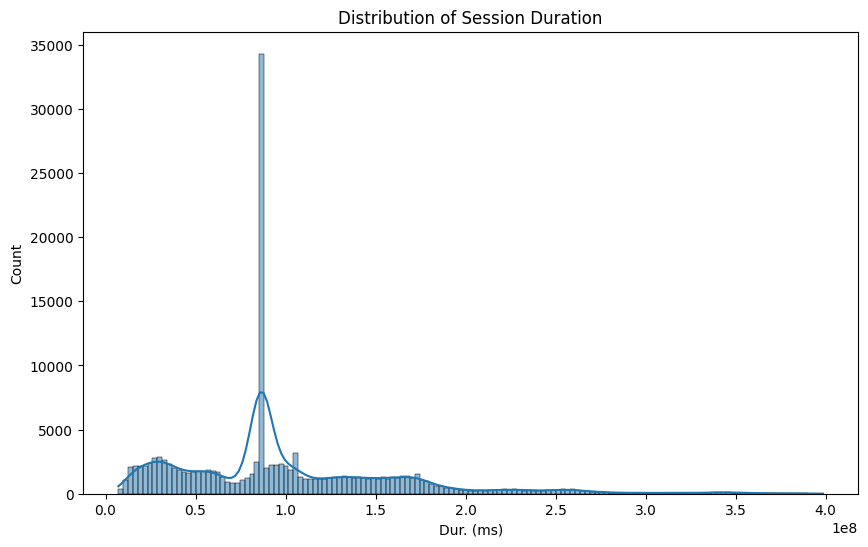

In [565]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for the quantitative variables
plt.figure(figsize=(10, 6))
sns.histplot(df['Dur. (ms)'], kde=True)
plt.title('Distribution of Session Duration')
plt.show()


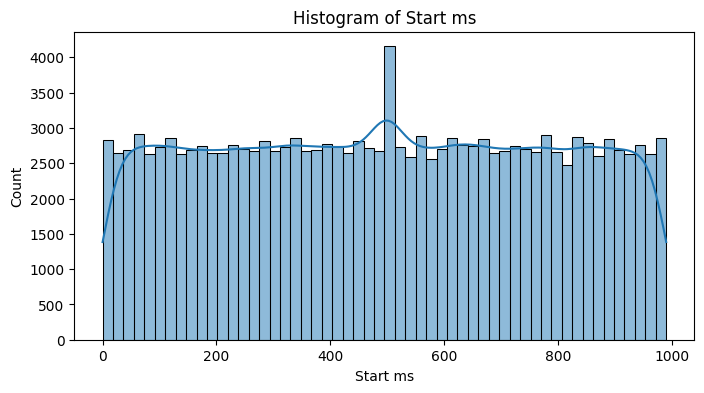

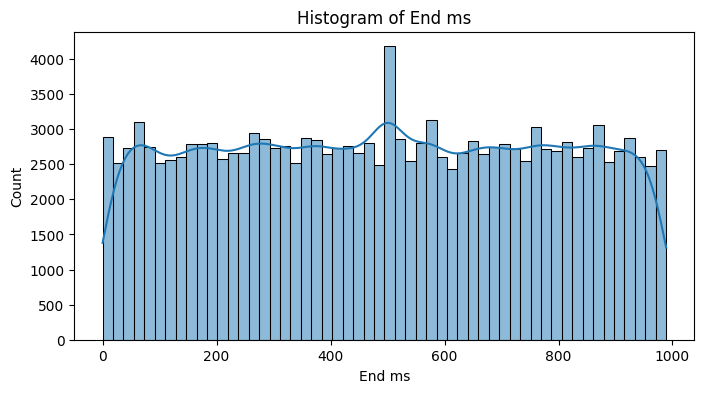

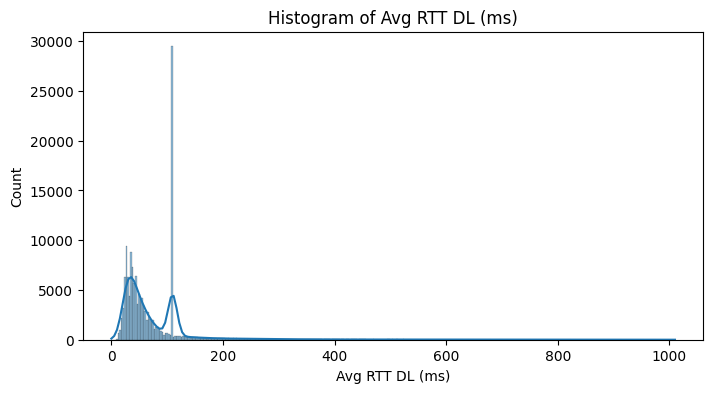

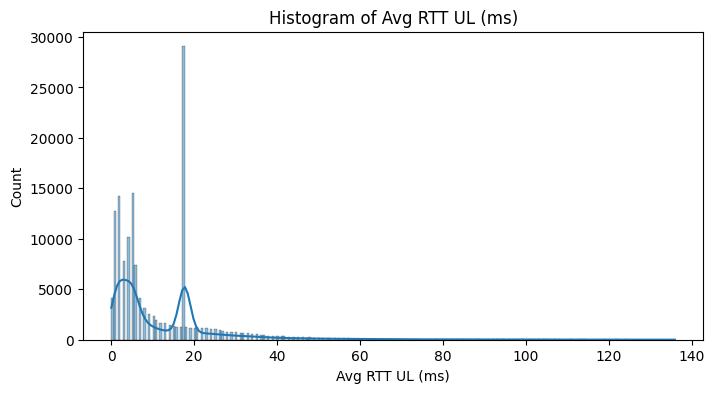

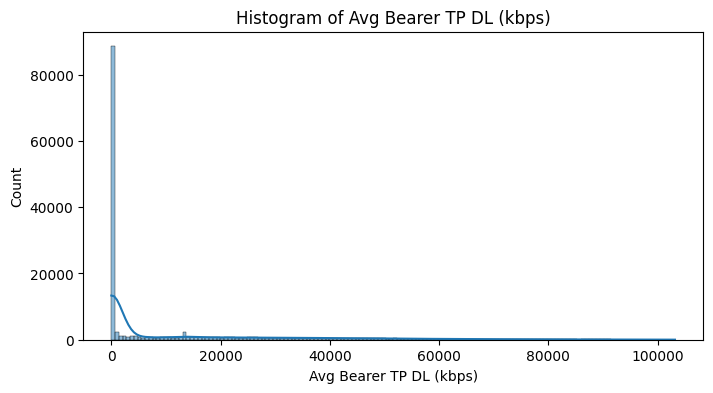

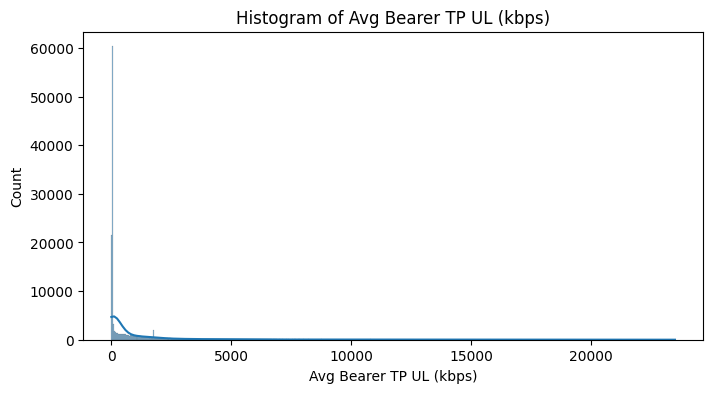

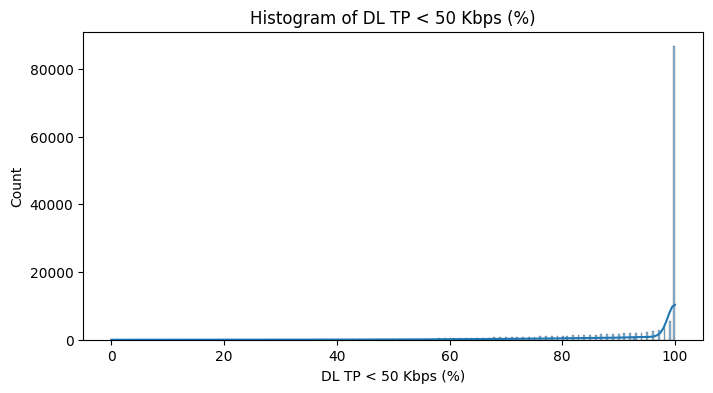

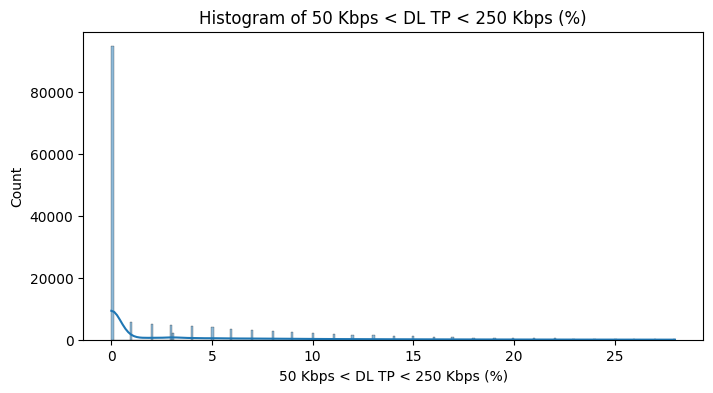

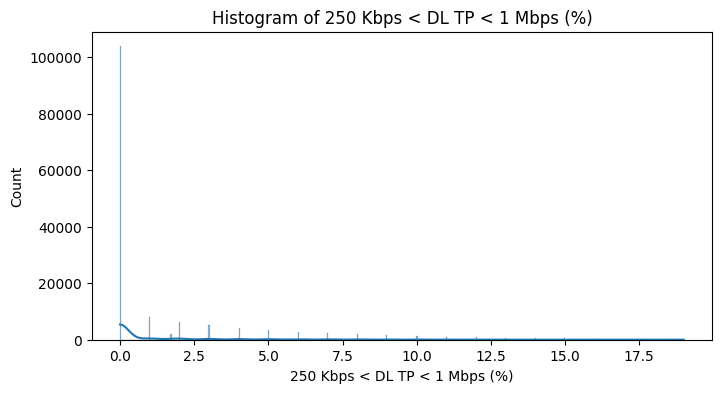

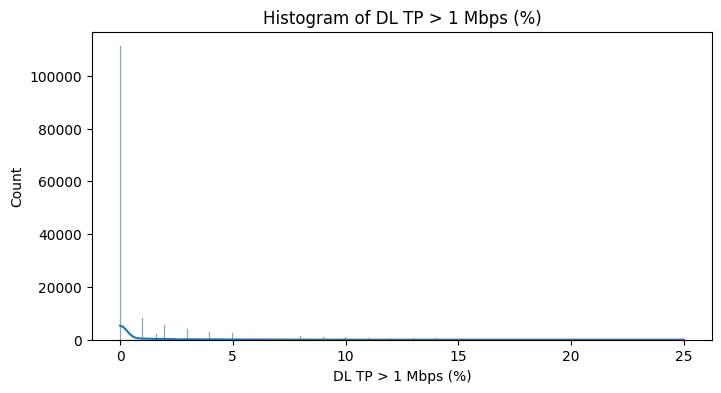

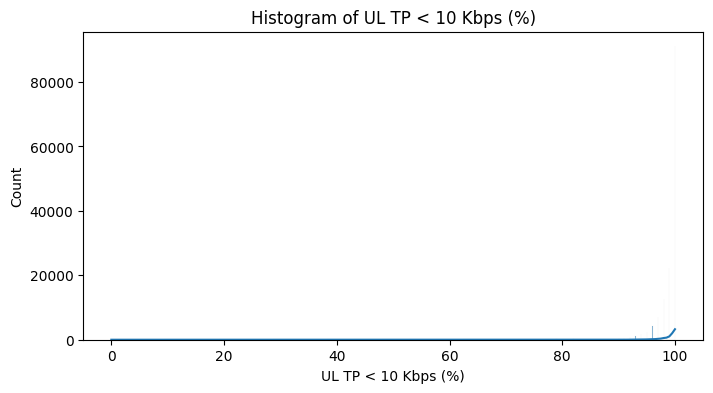

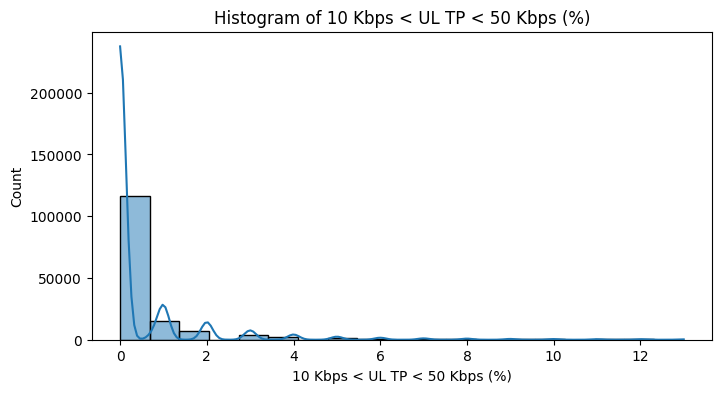

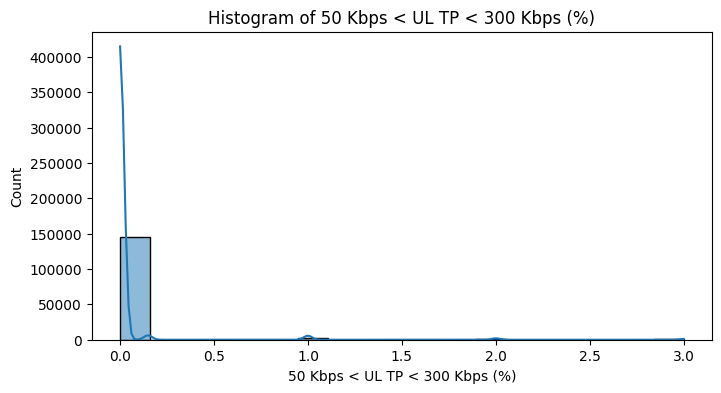

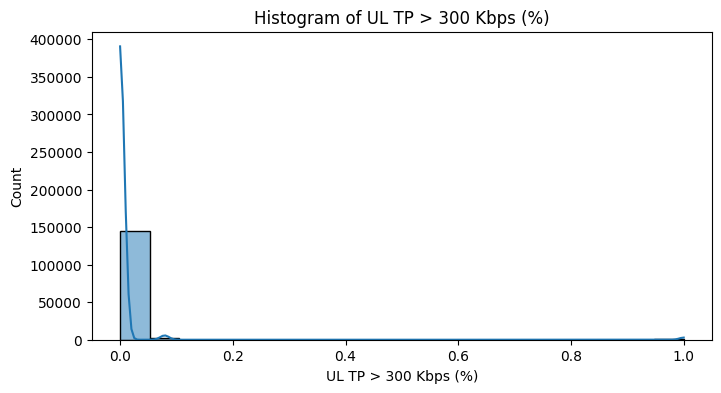

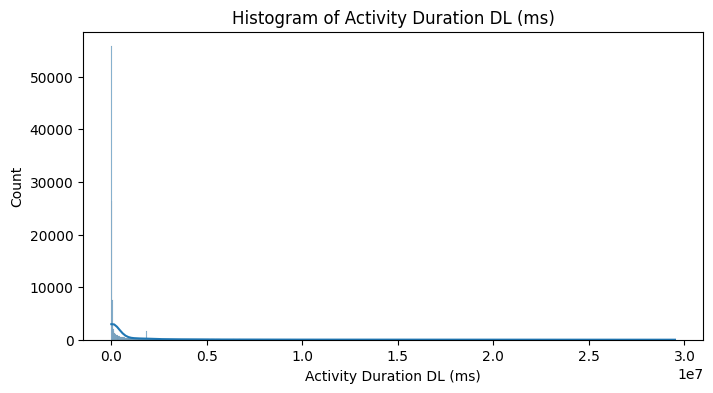

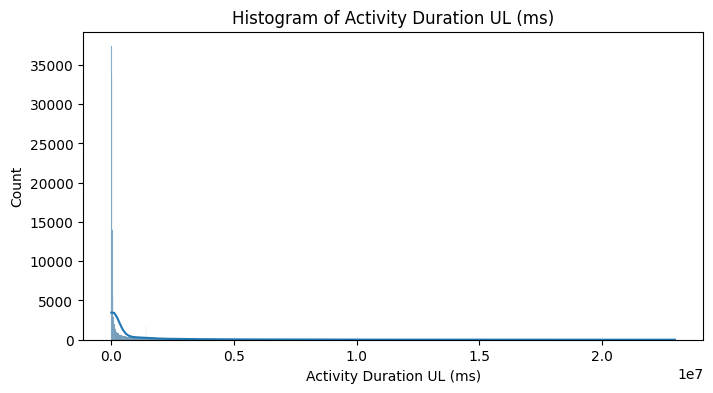

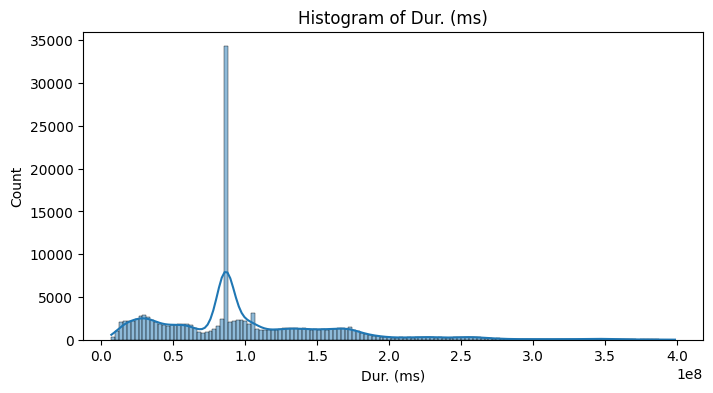

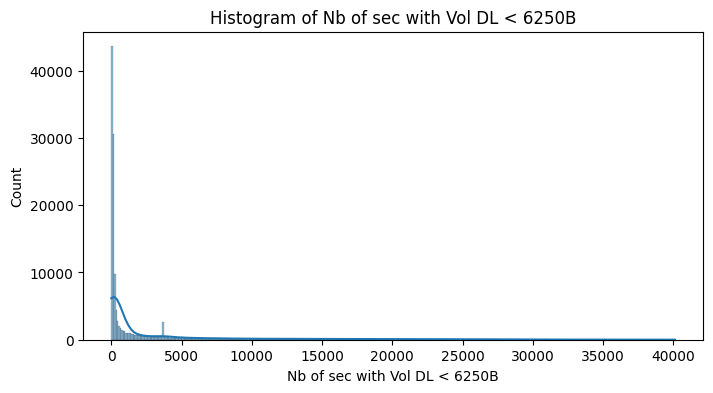

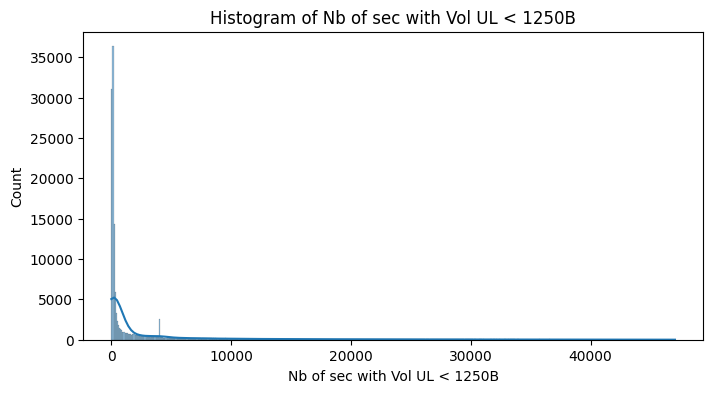

In [574]:
for col in numeric_columns:
    if col in df.columns:  # Check if column exists
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.show()



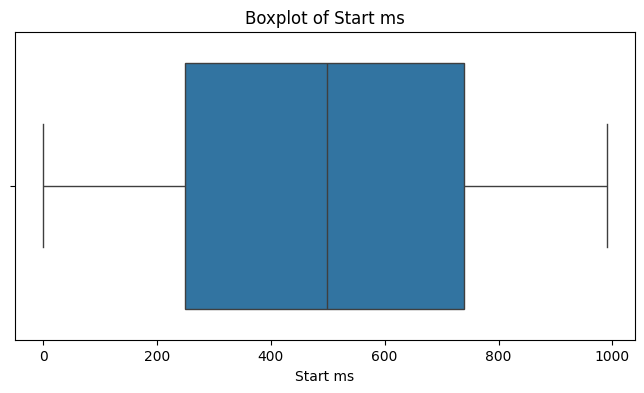

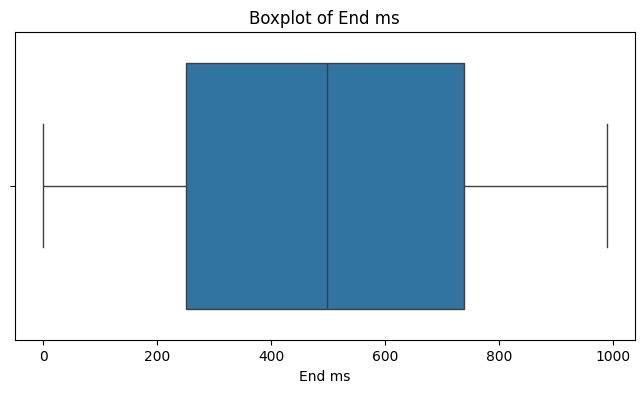

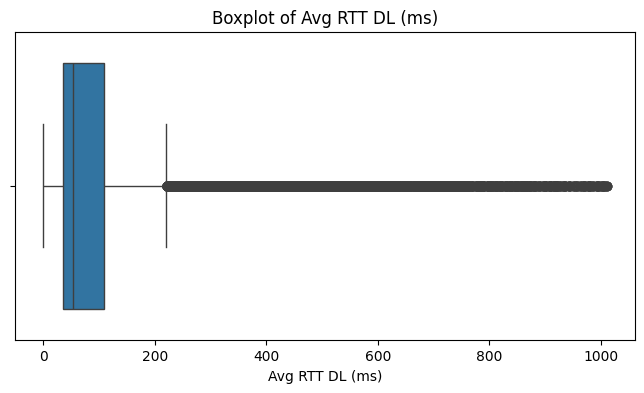

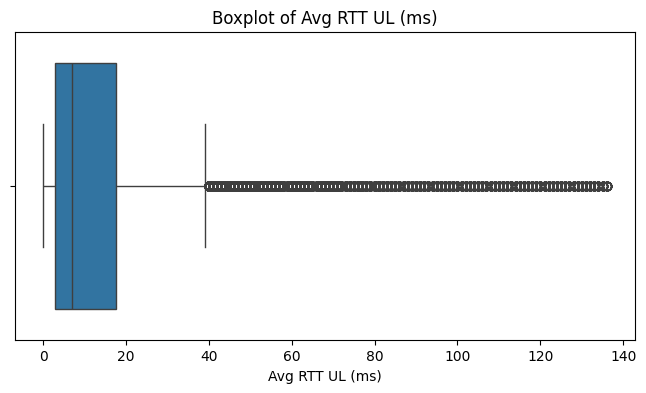

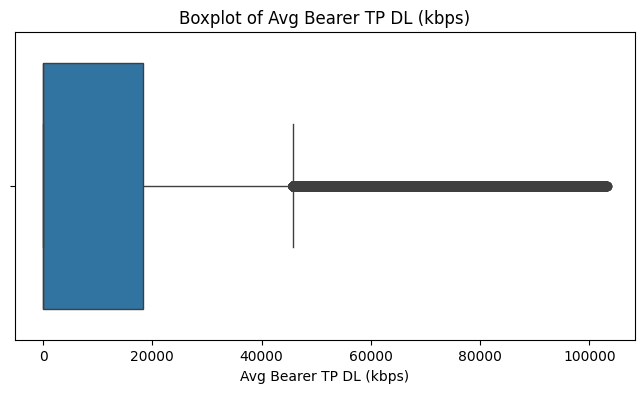

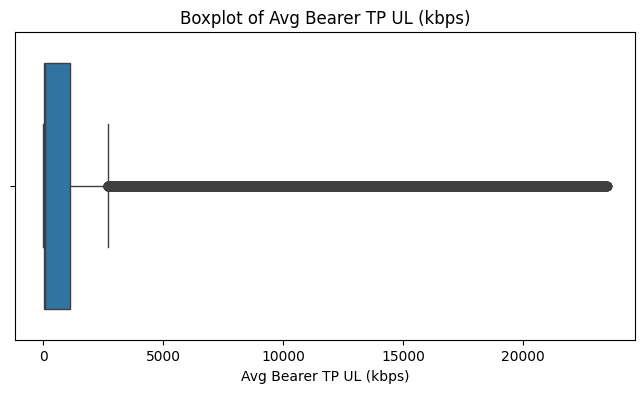

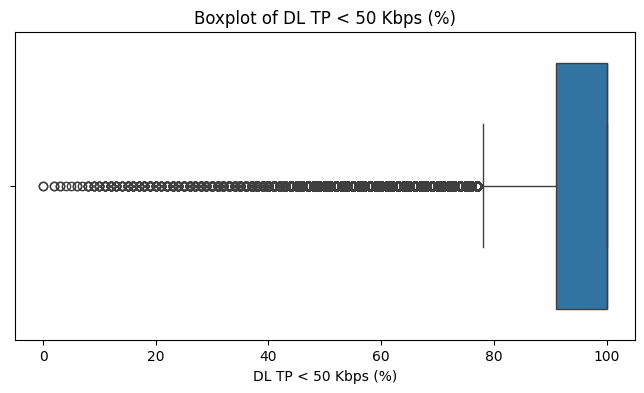

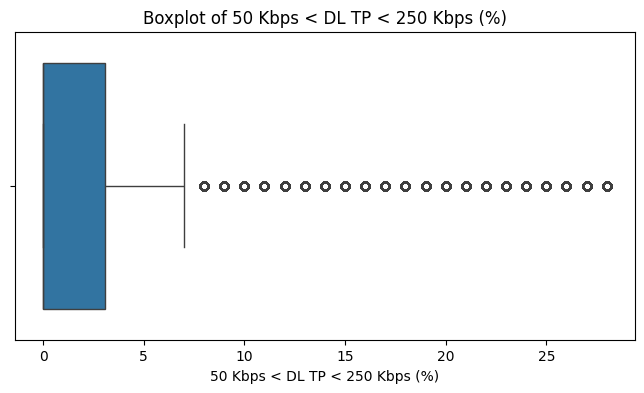

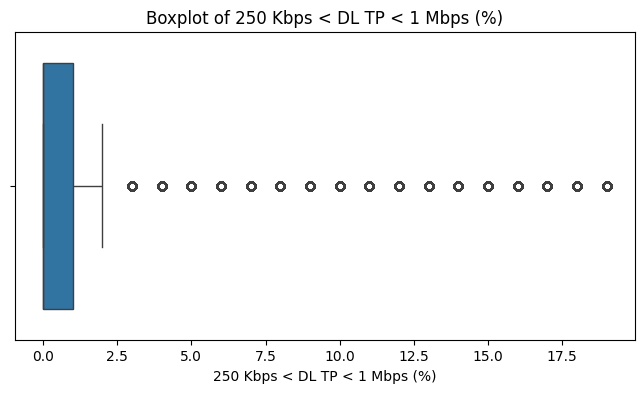

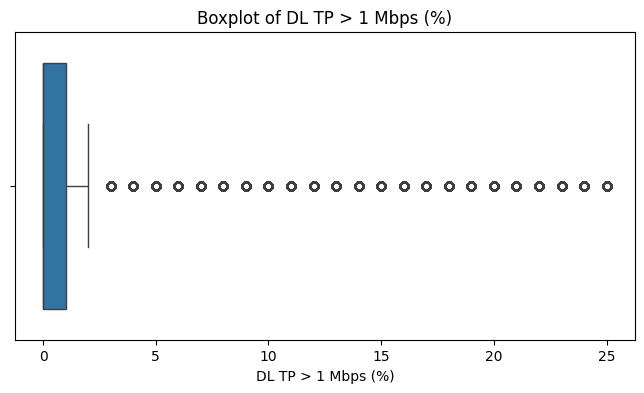

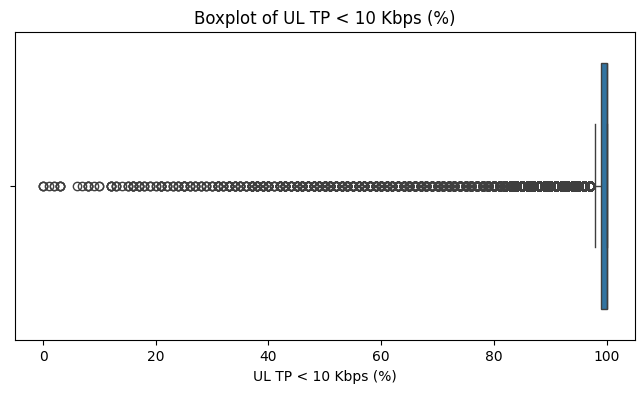

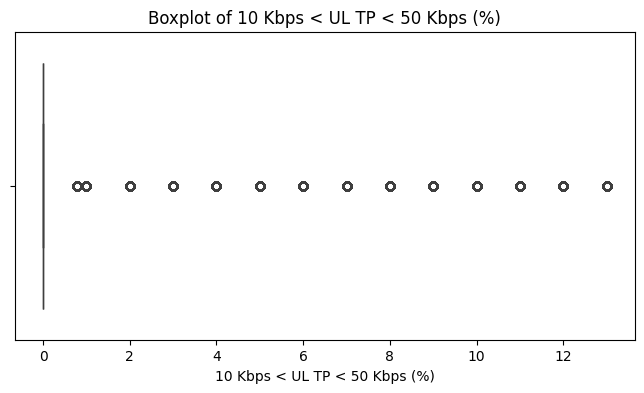

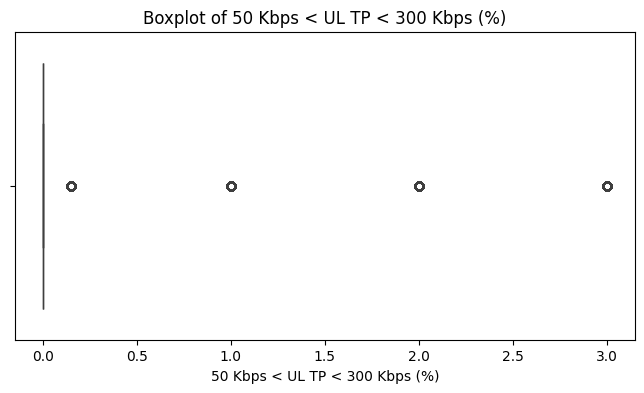

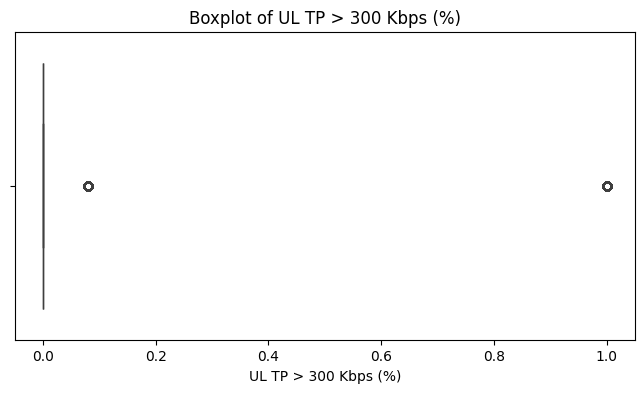

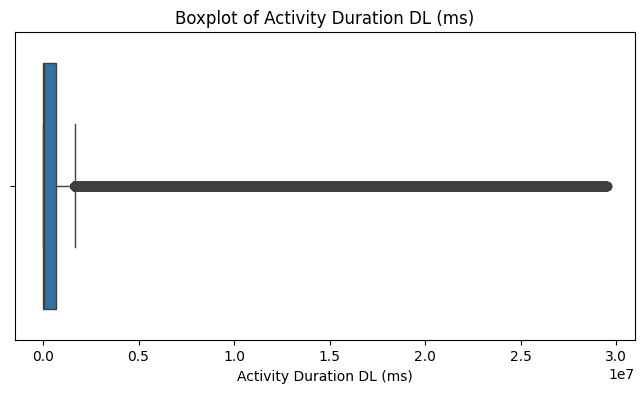

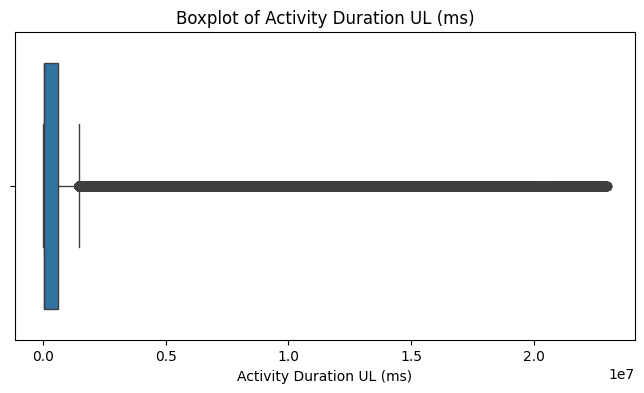

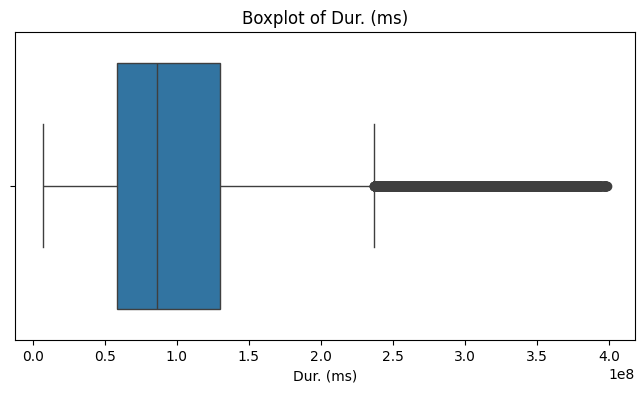

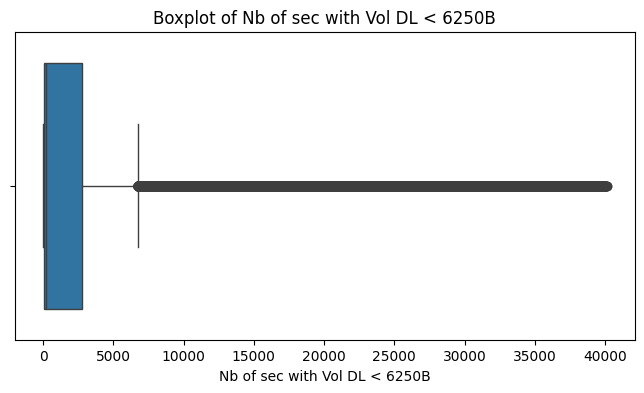

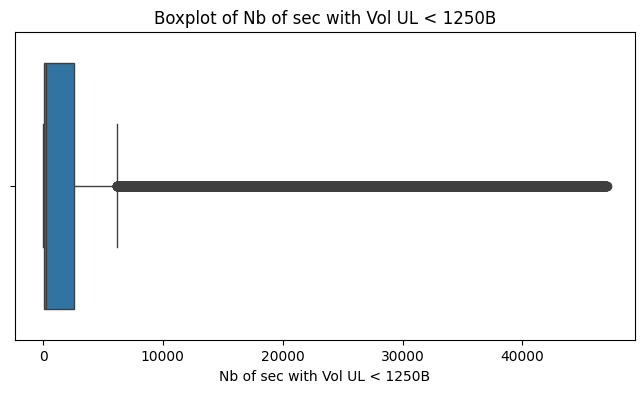

In [575]:

for col in numeric_columns:
    if col in df.columns:  # Check if column exists
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()



Bivariate Analysis

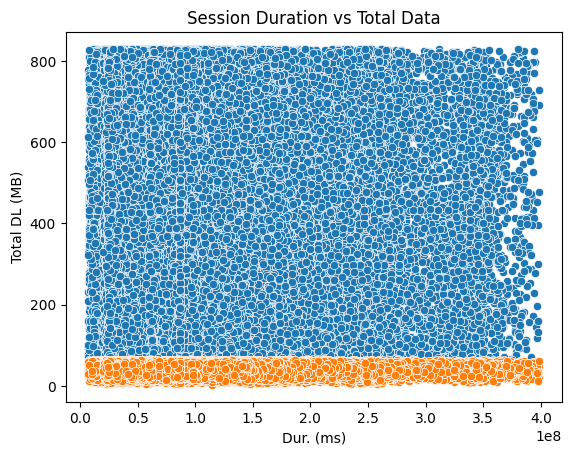

In [490]:
# Bivariate analysis (e.g., total data vs session duration)
sns.scatterplot(x='Dur. (ms)', y='Total DL (MB)', data=df)
sns.scatterplot(x='Dur. (ms)', y='Total UL (MB)', data=df)
plt.title('Session Duration vs Total Data')
plt.show()


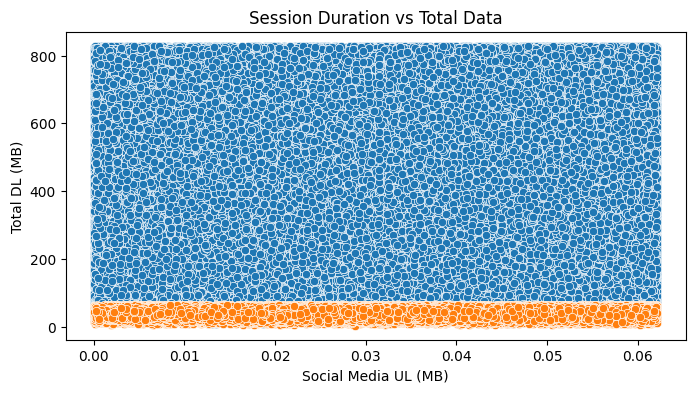

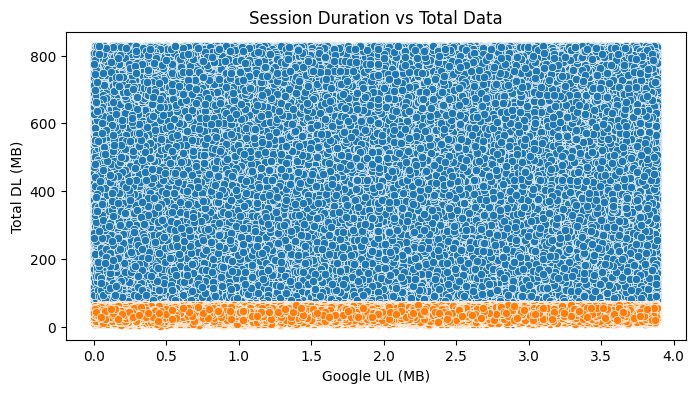

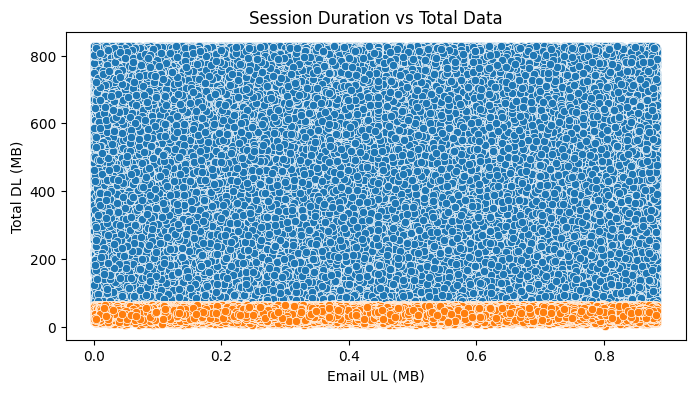

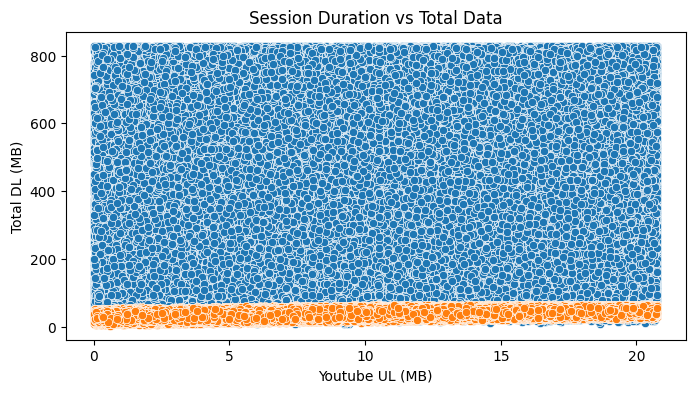

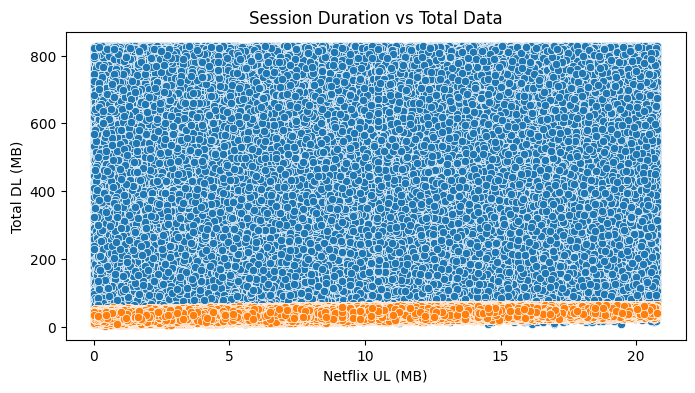

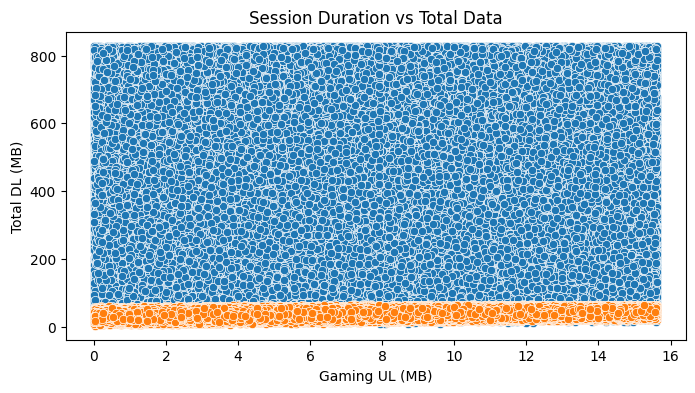

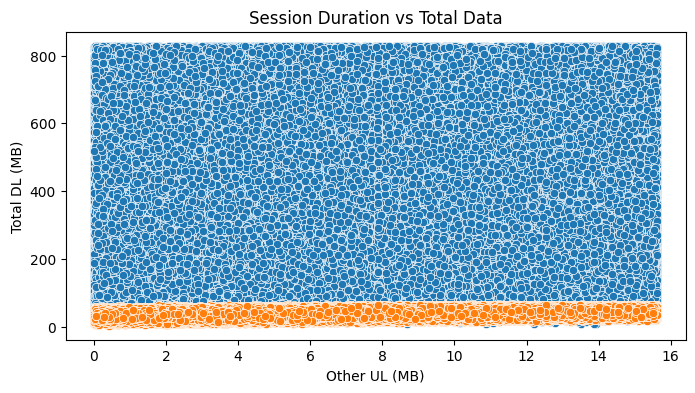

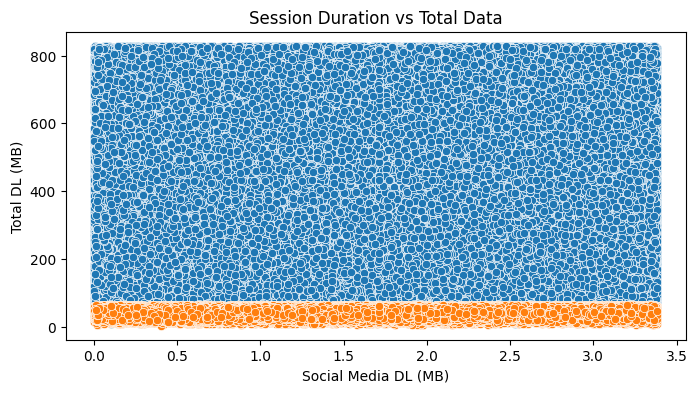

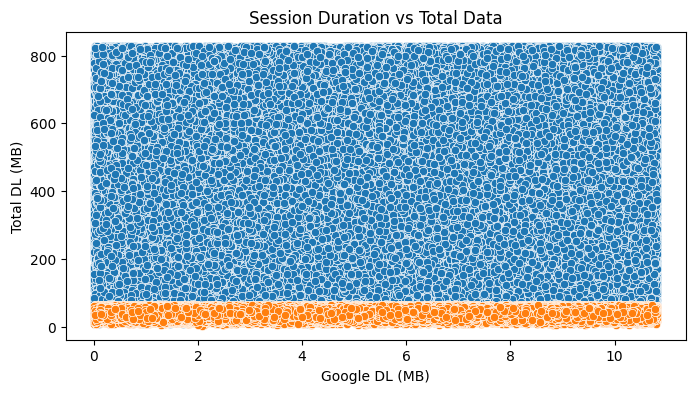

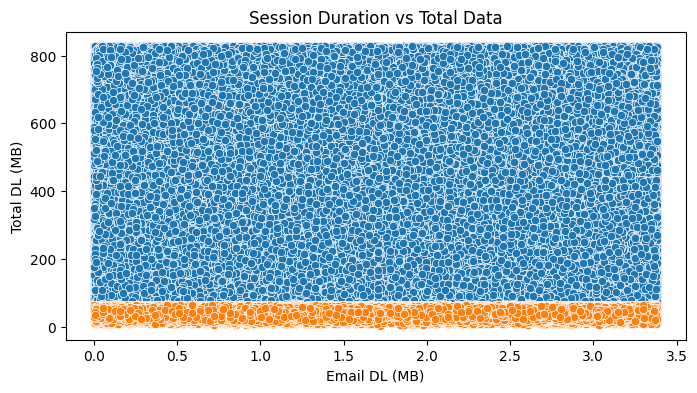

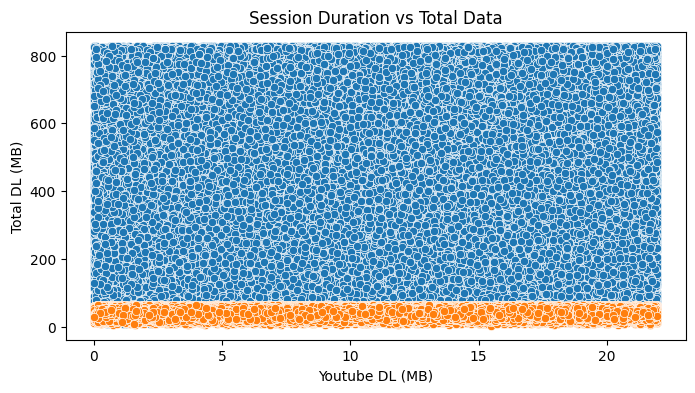

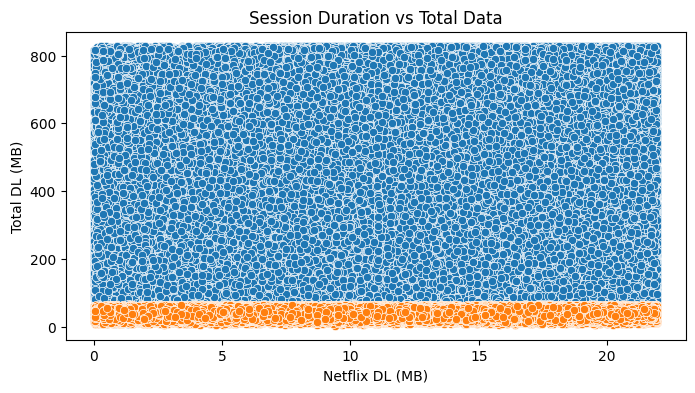

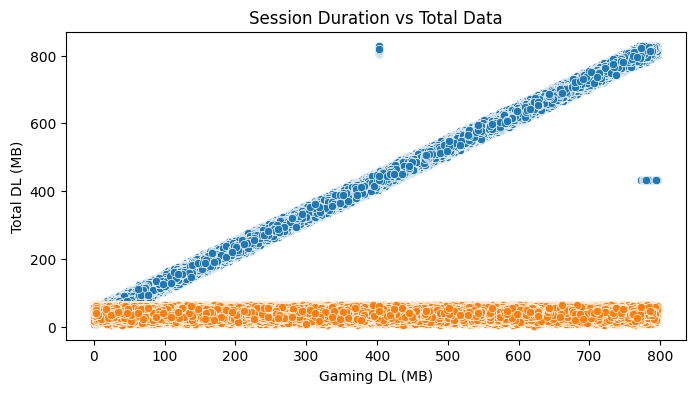

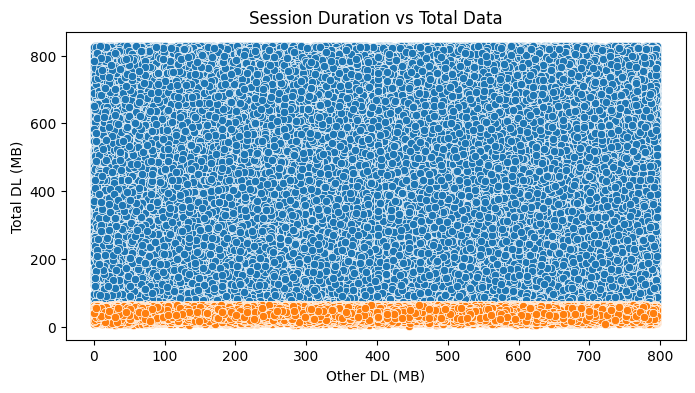

In [ ]:
# Relationship between applications and total data usage
applications = ['Social Media UL (MB)',  'Google UL (MB)','Email UL (MB)',  'Youtube UL (MB)',
        'Netflix UL (MB)', 'Gaming UL (MB)',  'Other UL (MB)','Social Media DL (MB)', 'Google DL (MB)','Email DL (MB)','Youtube DL (MB)','Netflix DL (MB)','Gaming DL (MB)','Other DL (MB)']

for app in applications:
    app_data = df[f"{app}"]
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=app_data, y='Total DL (MB)', data=df)
    sns.scatterplot(x=app_data, y='Total UL (MB)', data=df)
    plt.title('Session Duration vs Total Data')
    plt.show()



Correlation Analysis

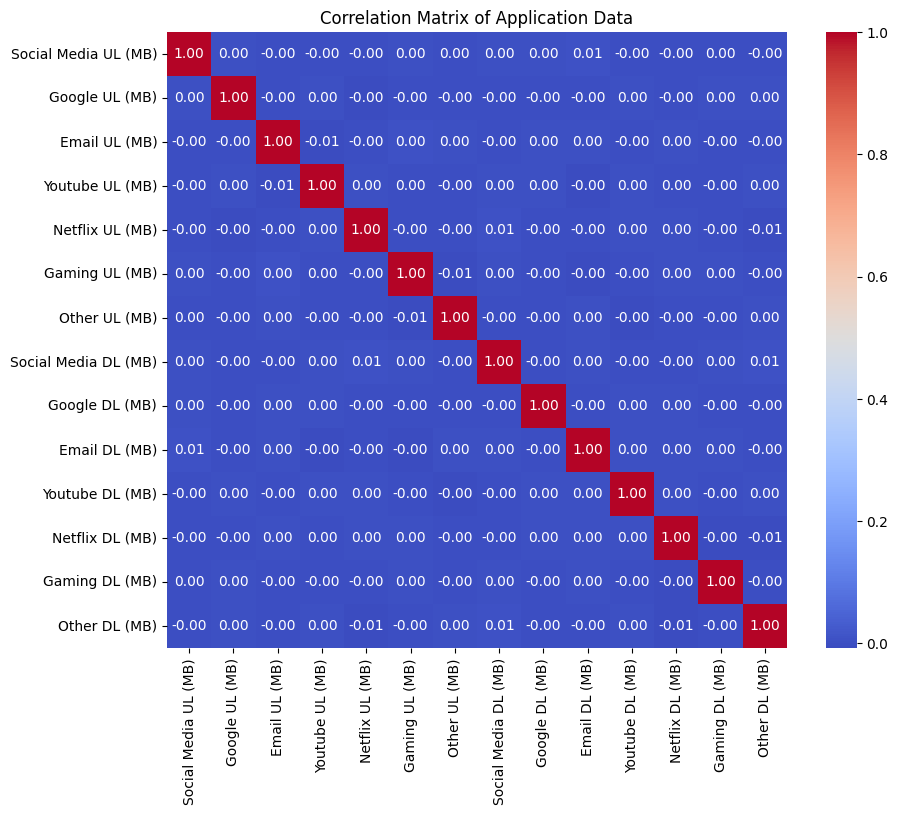

In [ ]:
# Subset application data
app_data = df[[f"{app}" for app in applications]]

# Compute correlation matrix
correlation_matrix = app_data.corr()

# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Application Data")
plt.show()


In [ ]:
# Correlation matrix for data usage in applications
correlation_data = df[['Social Media UL (MB)',  'Google UL (MB)','Email UL (MB)',  'Youtube UL (MB)',
        'Netflix UL (MB)', 'Gaming UL (MB)',  'Other UL (MB)','Social Media DL (MB)', 'Google DL (MB)','Email DL (MB)','Youtube DL (MB)','Netflix DL (MB)','Gaming DL (MB)','Other DL (MB)']].corr()
print(correlation_data)


                      Social Media UL (MB)  Google UL (MB)  Email UL (MB)  \
Social Media UL (MB)              1.000000        0.000901      -0.001150   
Google UL (MB)                    0.000901        1.000000      -0.002100   
Email UL (MB)                    -0.001150       -0.002100       1.000000   
Youtube UL (MB)                  -0.002174        0.002159      -0.007584   
Netflix UL (MB)                  -0.001824       -0.003916      -0.000021   
Gaming UL (MB)                    0.001400       -0.001636       0.004305   
Other UL (MB)                     0.000081       -0.001806       0.000785   
Social Media DL (MB)              0.000349       -0.000561      -0.001556   
Google DL (MB)                    0.003398       -0.000219       0.001151   
Email DL (MB)                     0.005193       -0.000810       0.002895   
Youtube DL (MB)                  -0.001746        0.000684      -0.000179   
Netflix DL (MB)                  -0.000636       -0.001913       0.000573   

Dimensionality Reduction using PCA

Explained Variance by Components: [0.07264301 0.07240736]


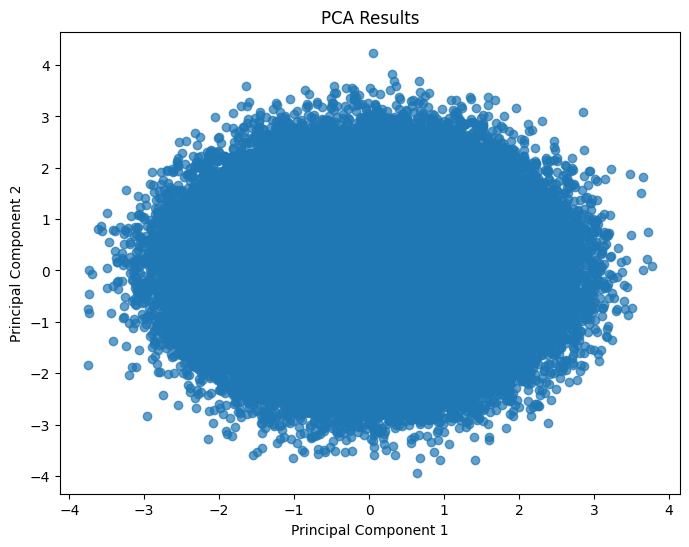

In [583]:
# Standardize Data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(app_data)

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# Variance Explained
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Components:", explained_variance)

# Plot PCA Results
plt.figure(figsize=(8, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.7)
plt.title("PCA Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
